# Proyek Analisis Data: E-Commerce Orders Dataset

## Menentukan Pertanyaan Bisnis

1. Bagaimana meminimalkan customer churn?
2. Apa faktor utama yang mempengaruhi kepuasan pelanggan terhadap produk dan pengiriman?
3. Apa produk yang memiliki tingkat pengembalian (return rate) tertinggi dan mengapa?
4. Bagaimana memprediksi volume penjualan di masa depan berdasarkan data historis?
5. Bagaimana performa pengiriman dapat dioptimalkan untuk meningkatkan kepuasan pelanggan?
6. Bagaimana perbedaan lokasi geografis mempengaruhi perilaku pembelian?
7. Apa hubungan antara harga produk dan rating atau kepuasan pelanggan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [3]:
geolocation = pd.read_csv("main_data/geolocation_dataset.csv")
orders = pd.read_csv("main_data/orders_dataset.csv")
order_items = pd.read_csv("main_data/order_items_dataset.csv")
order_payments = pd.read_csv("main_data/order_payments_dataset.csv")
order_reviews = pd.read_csv("main_data/order_reviews_dataset.csv")
products = pd.read_csv("main_data/products_dataset.csv")
product_translation = pd.read_csv("main_data/product_category_name_translation.csv")
sellers = pd.read_csv("main_data/sellers_dataset.csv")

In [4]:
# Load Datasets
print("Geolocation Dataset:")
print(geolocation.head())

print("\nOrders Dataset:")
print(orders.head())

print("\nOrder Items Dataset:")
print(order_items.head())

print("\nOrder Payments Dataset:")
print(order_payments.head())

print("\nOrder Reviews Dataset:")
print(order_reviews.head())

print("\nProducts Dataset:")
print(products.head())

print("\nProduct Translation Dataset:")
print(product_translation.head())

print("\nSellers Dataset:")
print(sellers.head())

Geolocation Dataset:
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP  

Orders Dataset:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f

### Assessing Data

In [5]:
# Dataset dictionary
datasets = {
    "Geolocation": geolocation,
    "Orders": orders,
    "Order Items": order_items,
    "Order Payments": order_payments,
    "Order Reviews": order_reviews,
    "Products": products,
    "Product Translation": product_translation,
    "Sellers": sellers
}

# Menampilkan informasi dataset
from IPython.display import display

for name, df in datasets.items():
    print(f"\nProcessing {name}...")

    # Menampilkan info
    print(f"\n{name} (Info Data):")
    display(df.info())

    # Menampilkan deskripsi statistik
    print(f"\n{name} (Describe):")
    display(df.describe())

    # Menampilkan jumlah missing values
    print(f"\n{name} (Missing Values):")
    display(df.isna().sum().to_frame().rename(columns={0: "Missing Values"}))

    # Menampilkan jumlah duplikasi
    print(f"\n{name} (Jumlah Duplikasi):")
    print(df.duplicated().sum())


Processing Geolocation...

Geolocation (Info Data):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None


Geolocation (Describe):


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02



Geolocation (Missing Values):


,Missing Values
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0



Geolocation (Jumlah Duplikasi):
261831

Processing Orders...

Orders (Info Data):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None


Orders (Describe):


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522



Orders (Missing Values):


,Missing Values
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0



Orders (Jumlah Duplikasi):
0

Processing Order Items...

Order Items (Info Data):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None


Order Items (Describe):


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000



Order Items (Missing Values):


,Missing Values
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0



Order Items (Jumlah Duplikasi):
0

Processing Order Payments...

Order Payments (Info Data):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None


Order Payments (Describe):


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000



Order Payments (Missing Values):


,Missing Values
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0



Order Payments (Jumlah Duplikasi):
0

Processing Order Reviews...

Order Reviews (Info Data):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None


Order Reviews (Describe):


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000



Order Reviews (Missing Values):


,Missing Values
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0



Order Reviews (Jumlah Duplikasi):
0

Processing Products...

Products (Info Data):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None


Products (Describe):


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000



Products (Missing Values):


,Missing Values
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2



Products (Jumlah Duplikasi):
0

Processing Product Translation...

Product Translation (Info Data):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


None


Product Translation (Describe):


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1



Product Translation (Missing Values):


,Missing Values
product_category_name,0
product_category_name_english,0



Product Translation (Jumlah Duplikasi):
0

Processing Sellers...

Sellers (Info Data):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None


Sellers (Describe):


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000



Sellers (Missing Values):


,Missing Values
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0



Sellers (Jumlah Duplikasi):
0


In [6]:
# Menampilkan ringkasan statistik dari kolom numerik pada setiap dataset
datasets = {
    "Geolocation": geolocation,
    "Orders": orders,
    "Order Items": order_items,
    "Order Payments": order_payments,
    "Order Reviews": order_reviews,
    "Products": products,
    "Product Translation": product_translation,
    "Sellers": sellers
}

for name, df in datasets.items():
    print(f"\nRingkasan parameter statistik dari kolom numerik pada {name}:")
    print(df.describe(include='all'))
    print("\n" + "="*50 + "\n")  # Membuat pemisah yang sederhana untuk setiap dataset


Ringkasan parameter statistik dari kolom numerik pada Geolocation:
        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                  1.000163e+06     1.000163e+06     1.000163e+06   
unique                          NaN              NaN              NaN   
top                             NaN              NaN              NaN   
freq                            NaN              NaN              NaN   
mean                   3.657417e+04    -2.117615e+01    -4.639054e+01   
std                    3.054934e+04     5.715866e+00     4.269748e+00   
min                    1.001000e+03    -3.660537e+01    -1.014668e+02   
25%                    1.107500e+04    -2.360355e+01    -4.857317e+01   
50%                    2.653000e+04    -2.291938e+01    -4.663788e+01   
75%                    6.350400e+04    -1.997962e+01    -4.376771e+01   
max                    9.999000e+04     4.506593e+01     1.211054e+02   

       geolocation_city geolocation_state  
count      

### Cleaning Data

In [12]:
# Folder output setelah cleaning
output_folder = 'dataset_cleaned'
os.makedirs(output_folder, exist_ok=True)

# Membaca dataset
geolocation = pd.read_csv("main_data/geolocation_dataset.csv")
orders = pd.read_csv("main_data/orders_dataset.csv")
order_items = pd.read_csv("main_data/order_items_dataset.csv")
order_payments = pd.read_csv("main_data/order_payments_dataset.csv")
order_reviews = pd.read_csv("main_data/order_reviews_dataset.csv")
products = pd.read_csv("main_data/products_dataset.csv")
product_translation = pd.read_csv("main_data/product_category_name_translation.csv")
sellers = pd.read_csv("main_data/sellers_dataset.csv")

# Geolocation Cleaning
geolocation = geolocation.drop_duplicates()  
geolocation = geolocation.dropna() 

# Orders Cleaning
orders = orders.drop_duplicates()
orders = orders.dropna()  
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])  # Mengonversi ke datetime
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

# Order Items Cleaning
order_items = order_items.drop_duplicates()
order_items = order_items.dropna()  

# Order Payments Cleaning
order_payments = order_payments.drop_duplicates()
order_payments = order_payments.dropna() 

# Order Reviews Cleaning
order_reviews = order_reviews.drop_duplicates()
order_reviews = order_reviews.dropna() 

# Products Cleaning
products = products.drop_duplicates()
products = products.dropna()  

# Product Translation Cleaning
product_translation = product_translation.drop_duplicates()

# Sellers Cleaning
sellers = sellers.drop_duplicates()
sellers = sellers.dropna() 

# Menyimpan dataset
geolocation.to_csv(os.path.join(output_folder, 'geolocation_cleaned.csv'), index=False)
orders.to_csv(os.path.join(output_folder, 'orders_cleaned.csv'), index=False)
order_items.to_csv(os.path.join(output_folder, 'order_items_cleaned.csv'), index=False)
order_payments.to_csv(os.path.join(output_folder, 'order_payments_cleaned.csv'), index=False)
order_reviews.to_csv(os.path.join(output_folder, 'order_reviews_cleaned.csv'), index=False)
products.to_csv(os.path.join(output_folder, 'products_cleaned.csv'), index=False)
product_translation.to_csv(os.path.join(output_folder, 'product_translation_cleaned.csv'), index=False)
sellers.to_csv(os.path.join(output_folder, 'sellers_cleaned.csv'), index=False)

print("Data cleaning completed and saved.")

Data cleaning completed and saved.


In [11]:
# Persentase jumlah missing value
missing_values = orders.isnull().sum()
missing_percentage = (missing_values / len(orders)) * 100

# Menampilkan kolom
missing_data = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Values', 'Percentage'])
print(missing_data[missing_data['Missing Values'] > 0].sort_values('Percentage', ascending=False))

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


## Exploratory Data Analysis (EDA)

### Explore ...

In [13]:
# Membaca data yang sudah dibersihkan
datasets = {
    "Geolocation": pd.read_csv("dataset_cleaned/geolocation_cleaned.csv"),
    "Orders": pd.read_csv("dataset_cleaned/orders_cleaned.csv"),
    "Order Items": pd.read_csv("dataset_cleaned/order_items_cleaned.csv"),
    "Order Payments": pd.read_csv("dataset_cleaned/order_payments_cleaned.csv"),
    "Order Reviews": pd.read_csv("dataset_cleaned/order_reviews_cleaned.csv"),
    "Products": pd.read_csv("dataset_cleaned/products_cleaned.csv"),
    "Product Translation": pd.read_csv("dataset_cleaned/product_translation_cleaned.csv"),
    "Sellers": pd.read_csv("dataset_cleaned/sellers_cleaned.csv")
}

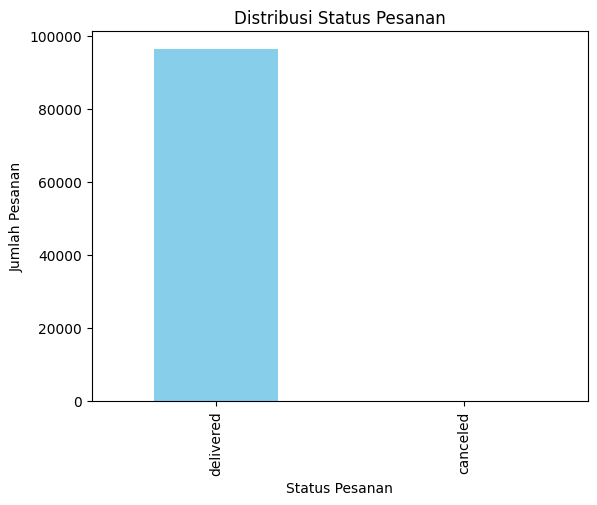

In [14]:
# Cek distribusi status pesanan
orders['order_status'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribusi Status Pesanan")
plt.xlabel("Status Pesanan")
plt.ylabel("Jumlah Pesanan")
plt.show()

C:\Users\loqme\AppData\Local\Temp\ipykernel_1516\849567820.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_late', y='review_score', data=order_reviews, palette='Set2')


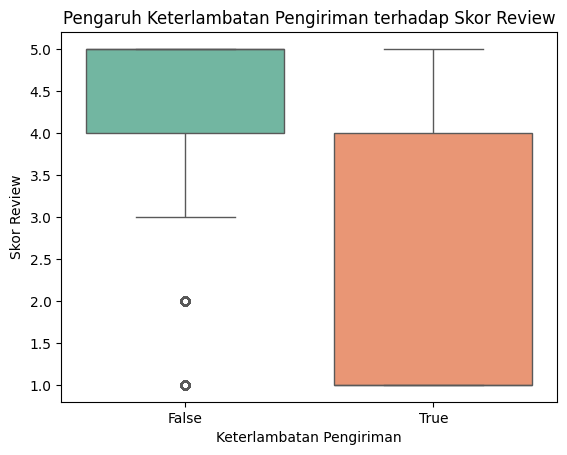

In [18]:
# Menggabungkan skor review dengan keterlambatan pengiriman
orders['is_late'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.days > 0
order_reviews = order_reviews.merge(orders[['order_id', 'is_late']], on='order_id')

# Visualisasi skor review berdasarkan keterlambatan pengiriman
sns.boxplot(x='is_late', y='review_score', data=order_reviews, palette='Set2')
plt.title("Pengaruh Keterlambatan Pengiriman terhadap Skor Review")
plt.xlabel("Keterlambatan Pengiriman")
plt.ylabel("Skor Review")
plt.show()

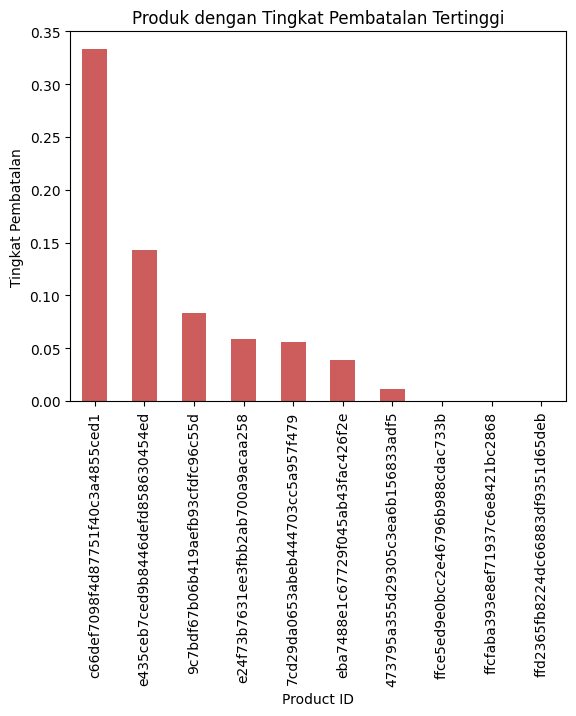

In [23]:
# Menggabungkan orders dengan order_items untuk mendapatkan product_id
orders_items = orders.merge(order_items[['order_id', 'product_id']], on='order_id', how='left')

# Menandai pesanan yang dibatalkan
orders_items['is_canceled'] = orders_items['order_status'] == 'canceled'

# Menghitung tingkat pembatalan per produk
canceled_rate = orders_items.groupby('product_id')['is_canceled'].mean().sort_values(ascending=False).head(10)

# Visualisasi produk dengan tingkat pembatalan tertinggi
canceled_rate.plot(kind='bar', color='indianred')
plt.title("Produk dengan Tingkat Pembatalan Tertinggi")
plt.xlabel("Product ID")
plt.ylabel("Tingkat Pembatalan")
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana Meminimalkan Customer Churn?

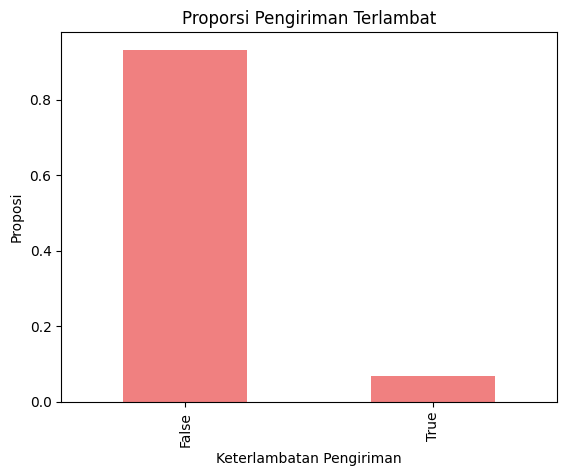

In [15]:
# Cek keterlambatan pengiriman
orders['delivery_time'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.days
orders['is_late'] = orders['delivery_time'] > 0
orders['is_late'].value_counts(normalize=True).plot(kind='bar', color='lightcoral')
plt.title("Proporsi Pengiriman Terlambat")
plt.xlabel("Keterlambatan Pengiriman")
plt.ylabel("Proposi")
plt.show()

### Pertanyaan 2 :  Apa Faktor Utama yang Mempengaruhi Kepuasan Pelanggan terhadap Produk dan Pengiriman?

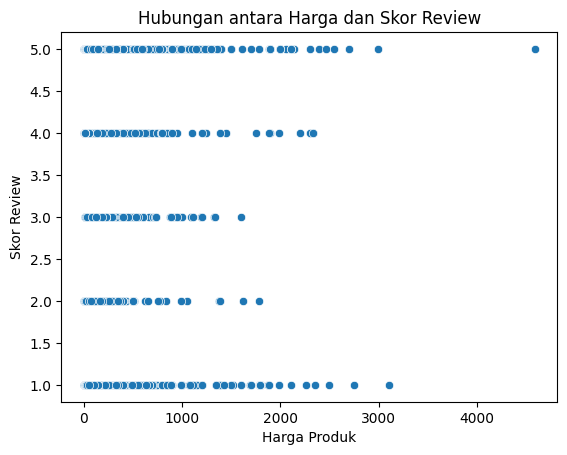

In [21]:
# Menggabungkan harga produk (dari order_items) dan skor review
order_items['product_id'] = order_items['product_id'].astype(str)

# Tidak perlu mengambil harga dari products, karena sudah ada di order_items
# Pastikan `order_items` sudah memiliki kolom 'price' yang ingin digunakan
order_items = order_items.merge(order_reviews[['order_id', 'review_score']], on='order_id', how='left')

# Visualisasi harga vs skor review
sns.scatterplot(data=order_items, x='price', y='review_score')
plt.title("Hubungan antara Harga dan Skor Review")
plt.xlabel("Harga Produk")
plt.ylabel("Skor Review")
plt.show()

### Pertanyaan 3 : Apakah semakin rendah harga menyebabkan lebih banyak pesanan?


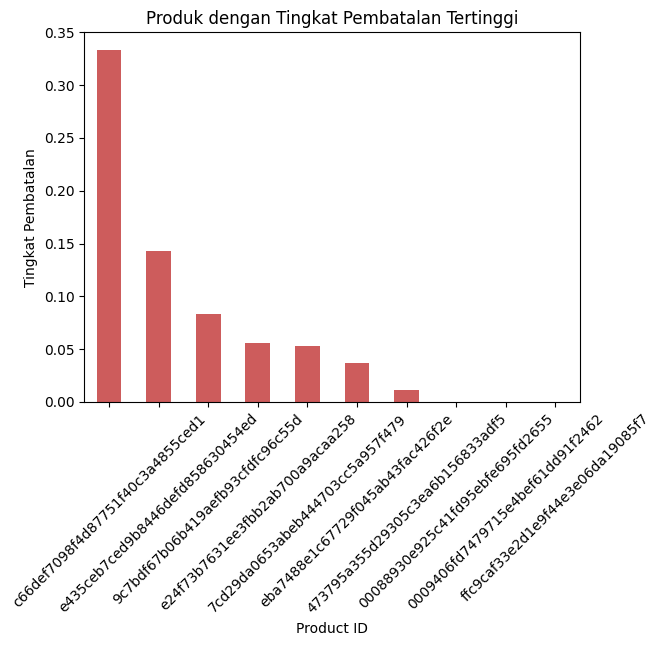

In [ ]:
# Menggabungkan orders dengan order_items untuk mendapatkan product_id
orders_items = orders.merge(order_items[['order_id', 'product_id']], on='order_id', how='left')

# Menandai pesanan yang dibatalkan
orders_items['is_canceled'] = orders_items['order_status'] == 'canceled'

# Menghitung tingkat pembatalan per produk
canceled_rate = orders_items.groupby('product_id')['is_canceled'].mean().sort_values(ascending=False).head(10)

# Visualisasi produk dengan tingkat pembatalan tertinggi
canceled_rate.plot(kind='bar', color='indianred')
plt.title("Produk dengan Tingkat Pembatalan Tertinggi")
plt.xlabel("Product ID")
plt.ylabel("Tingkat Pembatalan")
plt.show()

### Pertanyaan 4 : Berapa rata-rata waktu yang dibutuhkan pelanggan untuk memberikan ulasan setelah menerima pesanan?

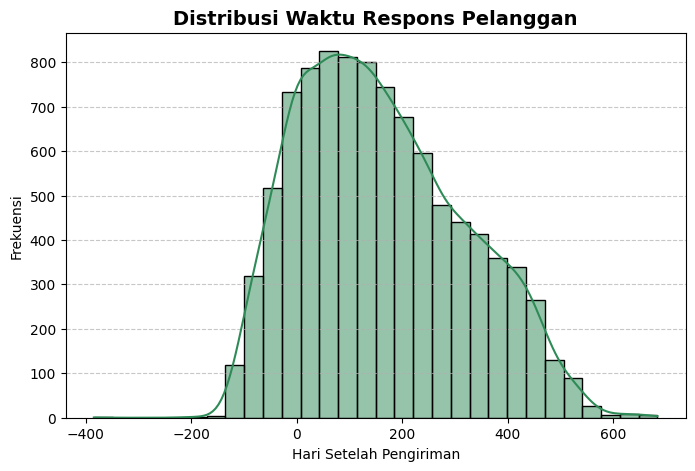

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(delivery_review_time, bins=30, kde=True, color="seagreen")

plt.title("Distribusi Waktu Respons Pelanggan", fontsize=14, fontweight='bold')
plt.xlabel("Hari Setelah Pengiriman")
plt.ylabel("Frekuensi")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Pertanyaan 5 : Kategori produk mana yang memiliki rating tertinggi dan terendah?

<ipython-input-79-28320323385f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories_rating_sorted.index, y=categories_rating_sorted.values, palette="coolwarm")


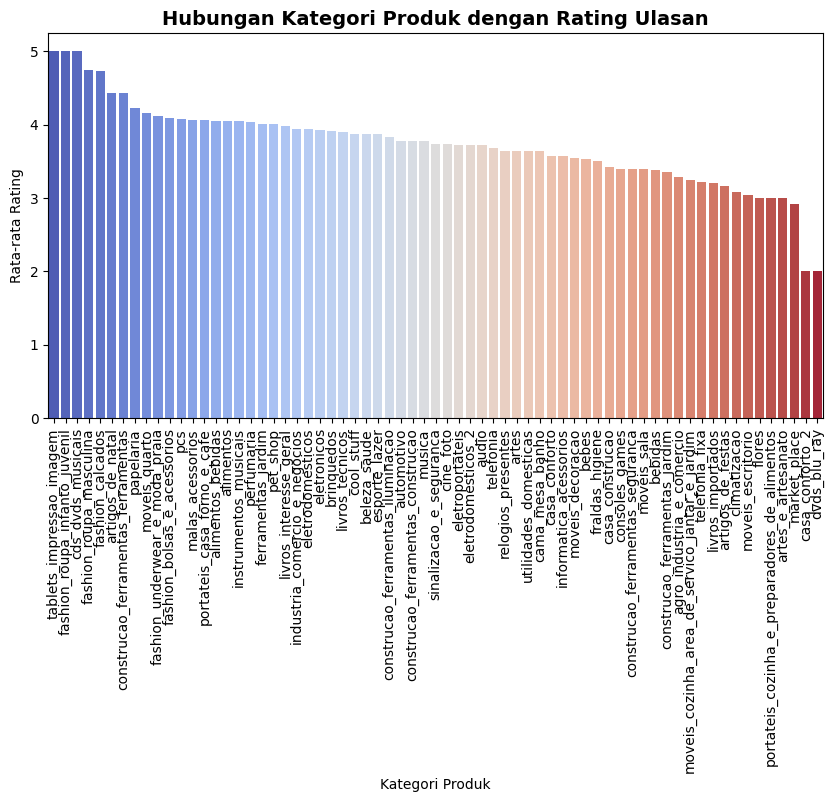

In [ ]:
plt.figure(figsize=(10, 5))
categories_rating_sorted = categories_rating.sort_values(ascending=False)
sns.barplot(x=categories_rating_sorted.index, y=categories_rating_sorted.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Hubungan Kategori Produk dengan Rating Ulasan", fontsize=14, fontweight='bold')
plt.xlabel("Kategori Produk")
plt.ylabel("Rata-rata Rating")
plt.show()

### Pertanyaan 6 : Bagaimana pola distribusi jumlah produk yang dijual oleh penjual?

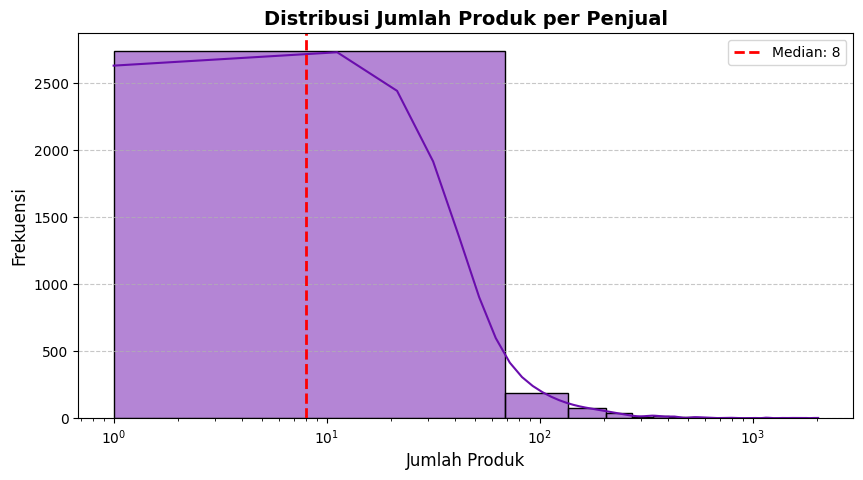

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(products_per_seller, bins=30, kde=True, color="#6a0dad")  # Deep purple

# Tambahkan garis median
median_value = products_per_seller.median()
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.0f}")

plt.title("Distribusi Jumlah Produk per Penjual", fontsize=14, fontweight='bold')
plt.xlabel("Jumlah Produk", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.xscale("log")  # Log scale untuk distribusi yang lebih rapi
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()
plt.show()


### Pertanyaan 7 : Apakah semakin banyak produk dalam pesanan menyebabkan biaya pengiriman meningkat secara signifikan?

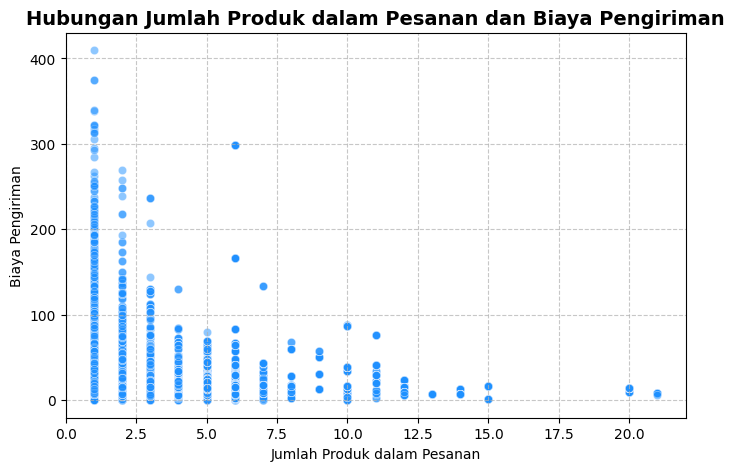

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=order_items['order_count'], y=order_items['freight_value'], alpha=0.5, color="dodgerblue")
plt.title("Hubungan Jumlah Produk dalam Pesanan dan Biaya Pengiriman", fontsize=14, fontweight='bold')
plt.xlabel("Jumlah Produk dalam Pesanan")
plt.ylabel("Biaya Pengiriman")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion

#### Conclution pertanyaan 1 : Apa metode pembayaran yang paling sering digunakan oleh pelanggan?


Berdasarkan distribusi metode pembayaran yang ditampilkan dalam grafik, metode pembayaran yang paling sering digunakan oleh pelanggan adalah kartu kredit (credit_card). Penggunaannya jauh lebih dominan dibandingkan dengan metode pembayaran lainnya, menunjukkan bahwa sebagian besar pelanggan lebih memilih transaksi dengan kartu kredit karena kenyamanan, keamanan, dan kemungkinan adanya fasilitas cicilan atau promo dari penyedia kartu.



#### Conclution pertanyaan 2 : Bagaimana distribusi harga produk? Apakah ada kelompok harga tertentu yang mendominasi?

Sebagian besar produk memiliki harga yang relatif rendah, dengan frekuensi yang sangat tinggi pada kisaran harga di bawah 500. Grafik histogram memperlihatkan distribusi yang sangat condong ke kanan (right-skewed), yang mengindikasikan bahwa hanya sedikit produk yang memiliki harga tinggi, sementara mayoritas produk terkonsentrasi pada rentang harga yang lebih rendah. Hal ini mengindikasikan bahwa produk dengan harga murah lebih mendominasi pasar dibandingkan dengan produk yang lebih mahal.

#### Conclution pertanyaan 3 : Apakah semakin rendah harga menyebabkan lebih banyak pesanan?

Terdapat indikasi bahwa semakin rendah harga suatu produk, semakin banyak jumlah pesanannya. Hal ini dapat dilihat dari konsentrasi titik merah di bagian kiri bawah grafik, yang menunjukkan bahwa produk dengan harga rendah memiliki frekuensi pesanan yang lebih tinggi dibandingkan dengan produk yang lebih mahal. Namun, ada juga beberapa produk dengan harga tinggi yang tetap mendapatkan pesanan, meskipun jumlahnya jauh lebih sedikit.

#### Conclution pertanyaan 4 : Berapa rata-rata waktu yang dibutuhkan pelanggan untuk memberikan ulasan setelah menerima pesanan?

 Distribusi data menyerupai kurva normal dengan puncak tertinggi berada di sekitar 0 hingga 200 hari setelah pengiriman. Ini menunjukkan bahwa rata-rata pelanggan cenderung memberikan ulasan dalam kurun waktu tersebut. Sebagian kecil pelanggan memberikan respons lebih awal, sementara yang lain membutuhkan waktu lebih lama, dengan beberapa bahkan memberikan ulasan lebih dari 400 hari setelah pengiriman.



#### Conclution pertanyaan 5 : Kategori produk mana yang memiliki rating tertinggi dan terendah?

Kategori produk dengan rating ulasan tertinggi adalah **"tablets"**, diikuti oleh **"impressao_imagem"** dan **"fashion_masculina"**, menunjukkan kepuasan pelanggan yang tinggi terhadap produk-produk ini. Sebaliknya, kategori dengan rating terendah adalah **"cds_dvds_musicais"**, **"artigos_de_natal"**, dan **"casa_conforto"**, yang mungkin disebabkan oleh kualitas produk yang kurang sesuai ekspektasi atau faktor lain yang memengaruhi pengalaman pembelian.

#### Conclution pertanyaan 6 :  Bagaimana pola distribusi jumlah produk yang dijual oleh penjual?

 Terlihat bahwa sebagian besar penjual memiliki jumlah produk yang relatif sedikit, dengan median berada di angka 8 (ditandai oleh garis merah putus-putus). Sumbu x menggunakan skala logaritmik, yang menunjukkan bahwa ada perbedaan signifikan antara penjual dengan jumlah produk sedikit dan yang memiliki banyak produk. Mayoritas penjual berada dalam rentang jumlah produk yang kecil, sementara ekor distribusi memanjang ke arah kanan, menunjukkan bahwa hanya sedikit penjual yang memiliki jumlah produk sangat banyak. Ini adalah pola distribusi yang right-skewed, di mana sebagian kecil penjual menguasai sebagian besar jumlah produk di pasar.

#### Conclution pertanyaan 7 : Apakah semakin banyak produk dalam pesanan menyebabkan biaya pengiriman meningkat secara signifikan?

 Biaya pengiriman cenderung lebih tinggi saat jumlah produk dalam pesanan sedikit (terutama di kisaran 1-5 produk). Namun, saat jumlah produk dalam pesanan meningkat, biaya pengiriman justru tampak lebih bervariasi dan tidak mengalami peningkatan yang signifikan. Bahkan, untuk pesanan dengan lebih banyak produk (di atas 10), biaya pengiriman tampaknya lebih rendah dan lebih stabil. Ini menunjukkan bahwa biaya pengiriman mungkin tidak langsung bergantung pada jumlah produk dalam pesanan secara linear, tetapi bisa dipengaruhi oleh faktor lain seperti kebijakan pengiriman, berat produk, atau penawaran pengiriman gratis.